## Introduction:
This Jupiter notebook file covers the implementation of a machine learning algorithm for detecting the American Sign Language (ASL) alphabet. For this project, we are using the [Sign Language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist) dataset, which contains 24 classes for the alphabet A to Z, excluding J and Z from the dataset because they can't be captured in a single image (as it is a gesture). The motivation for this project is to make a translator for the signers.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# run this cell to connect colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# update base path based on your root directory
base_path = '/content/drive/MyDrive/Colab Notebooks/Sign Language Detection/'

In [3]:
train = pd.read_csv(f'{base_path}data/sign_mnist_train.csv')
test = pd.read_csv(f'{base_path}data/sign_mnist_test.csv')

In [4]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

class_names = [
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y',
    'Z'
    ]

Displaying a random output image with its label.

Label: W


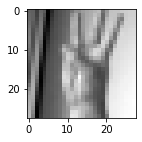

In [5]:
index = random.randint(1, train_data.shape[0])
fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(train_data[index,1:].reshape((28, 28)), cmap='gray')
print("Label:", class_names[int(train_data[index,0])])

Preparing training and testing data from the dataset downloaded.

In [6]:
X_train = train_data[:, 1:] / 255.
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))

X_test = test_data[:, 1:] / 255.
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

y_train = train_data[:, 0]
y_test = test_data[:, 0]

We are using to_categorical() function to convert all the integer representation in the output data to a vector representation of 26 length.

**Example:** 

```
from keras.utils import to_categorical
y = [
  [3],
  [5],
  [1],
  [25]
]
print(to_categorical(y, num_classes = 26))
```
**Output:**
```
[
  [0 0 0 1 0 ... 0 0]
  [0 0 0 0 0 ... 0 0]
  [0 1 0 0 0 ... 0 0]
  [0 0 0 0 0 ... 0 1]
]
```




In [7]:
y_train_categorical = to_categorical(y_train, num_classes=26)
y_test_categorical = to_categorical(y_test, num_classes=26)

### Model - 1


In [8]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(26, activation='softmax'))

model1.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc'],
  )

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [9]:
history1 = model1.fit(
    X_train, 
    y_train_categorical, 
    batch_size = 128, 
    epochs = 10, 
    validation_data = (X_test, y_test_categorical)
  )

Epoch 1/10
215/215 [==============================] - 35s 159ms/step - loss: 2.6464 - acc: 0.1898 - val_loss: 1.6724 - val_acc: 0.4916
Epoch 2/10
215/215 [==============================] - 39s 179ms/step - loss: 1.2134 - acc: 0.5879 - val_loss: 0.8280 - val_acc: 0.7177
Epoch 3/10
215/215 [==============================] - 29s 134ms/step - loss: 0.6913 - acc: 0.7608 - val_loss: 0.5545 - val_acc: 0.7895
Epoch 4/10
215/215 [==============================] - 29s 135ms/step - loss: 0.4713 - acc: 0.8390 - val_loss: 0.4417 - val_acc: 0.8553
Epoch 5/10
215/215 [==============================] - 28s 132ms/step - loss: 0.3279 - acc: 0.8909 - val_loss: 0.3486 - val_acc: 0.8819
Epoch 6/10
215/215 [==============================] - 30s 141ms/step - loss: 0.2385 - acc: 0.9205 - val_loss: 0.3068 - val_acc: 0.8997
Epoch 7/10
215/215 [==============================] - 31s 144ms/step - loss: 0.1814 - acc: 0.9418 - val_loss: 0.2819 - val_acc: 0.9108
Epoch 8/10
215/215 [==============================] - 2

In [14]:
model1.save(f'{base_path}saved_models/model1.hdf5')

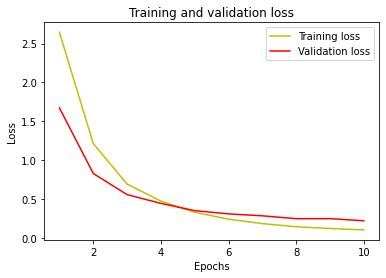

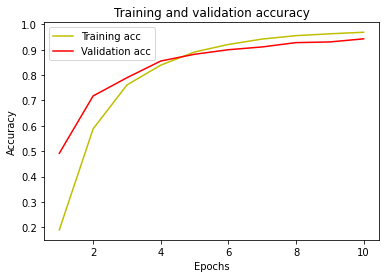

In [10]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['acc']
val_acc = history1.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy Score =  0.9426938092582264
Predicted Label:  V
True Label:  V


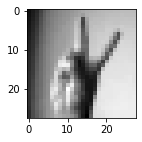

In [21]:
prediction1 = np.argmax(model1.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, prediction1)
print('Accuracy Score = ', accuracy1)

i = random.randint(1,len(prediction1))
fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0].reshape((28, 28)), cmap='gray') 
print("Predicted Label: ", class_names[int(prediction1[i])])
print("True Label: ", class_names[int(y_test[i])])

Although we are getting 94% accuracy but we can increase this accuracy by using ensembling. So for that we will train two more models.

### Model - 2

In [17]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())
model2.add(Dense(26, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 64)          36928     
                                                      

In [18]:
history2 = model2.fit(
    X_train, 
    y_train_categorical, 
    batch_size = 128, 
    epochs = 10,
    validation_data = (X_test, y_test_categorical)
  )

Epoch 1/10
215/215 [==============================] - 86s 397ms/step - loss: 1.5532 - acc: 0.5144 - val_loss: 0.7265 - val_acc: 0.7704
Epoch 2/10
215/215 [==============================] - 70s 327ms/step - loss: 0.1701 - acc: 0.9437 - val_loss: 0.6043 - val_acc: 0.8458
Epoch 3/10
215/215 [==============================] - 87s 406ms/step - loss: 0.0433 - acc: 0.9874 - val_loss: 0.6872 - val_acc: 0.8332
Epoch 4/10
215/215 [==============================] - 112s 522ms/step - loss: 0.0069 - acc: 0.9988 - val_loss: 0.7046 - val_acc: 0.8628
Epoch 5/10
215/215 [==============================] - 88s 409ms/step - loss: 3.4876e-04 - acc: 1.0000 - val_loss: 0.7248 - val_acc: 0.8714
Epoch 6/10
215/215 [==============================] - 88s 409ms/step - loss: 1.8131e-04 - acc: 1.0000 - val_loss: 0.7878 - val_acc: 0.8698
Epoch 7/10
215/215 [==============================] - 76s 355ms/step - loss: 1.2469e-04 - acc: 1.0000 - val_loss: 0.7889 - val_acc: 0.8738
Epoch 8/10
215/215 [======================

In [19]:
model2.save(f'{base_path}saved_models/model2.hdf5')

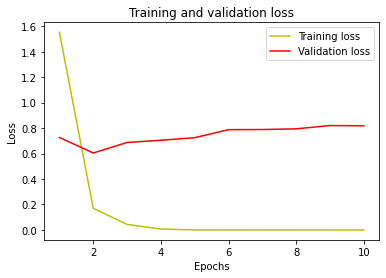

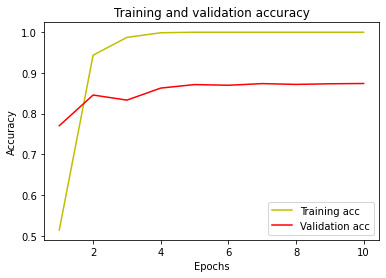

In [20]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history2.history['acc']
val_acc = history2.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy Score =  0.8740936977133296
Predicted Label:  D
True Label:  D


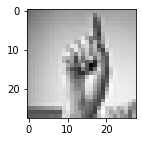

In [22]:
prediction2 = np.argmax(model2.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, prediction2)
print('Accuracy Score = ', accuracy2)

i = random.randint(1,len(prediction2))
fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0].reshape((28, 28)), cmap='gray') 
print("Predicted Label: ", class_names[int(prediction2[i])])
print("True Label: ", class_names[int(y_test[i])])

### Model - 3

In [26]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(26, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 64)         

In [27]:
history3 = model3.fit(
    X_train, 
    y_train_categorical, 
    batch_size = 128, 
    epochs = 10,
    validation_data = (X_test, y_test_categorical)
  )

Epoch 1/10
215/215 [==============================] - 29s 134ms/step - loss: 1.8605 - acc: 0.4612 - val_loss: 0.9526 - val_acc: 0.7133
Epoch 2/10
215/215 [==============================] - 40s 186ms/step - loss: 0.5510 - acc: 0.8317 - val_loss: 0.5421 - val_acc: 0.8176
Epoch 3/10
215/215 [==============================] - 25s 119ms/step - loss: 0.2626 - acc: 0.9218 - val_loss: 0.3776 - val_acc: 0.8802
Epoch 4/10
215/215 [==============================] - 26s 123ms/step - loss: 0.1449 - acc: 0.9594 - val_loss: 0.3396 - val_acc: 0.8926
Epoch 5/10
215/215 [==============================] - 31s 144ms/step - loss: 0.0869 - acc: 0.9777 - val_loss: 0.2932 - val_acc: 0.9136
Epoch 6/10
215/215 [==============================] - 36s 167ms/step - loss: 0.0577 - acc: 0.9869 - val_loss: 0.2875 - val_acc: 0.9204
Epoch 7/10
215/215 [==============================] - 26s 123ms/step - loss: 0.0423 - acc: 0.9902 - val_loss: 0.2701 - val_acc: 0.9240
Epoch 8/10
215/215 [==============================] - 3

In [28]:
model3.save(f'{base_path}saved_models/model3.hdf5')

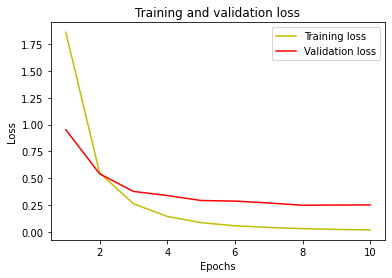

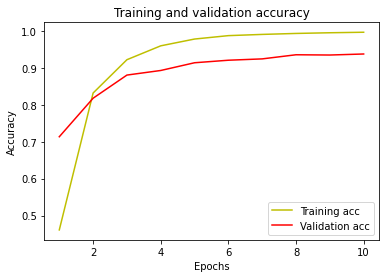

In [29]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history3.history['acc']
val_acc = history3.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy Score =  0.9372559955382042
Predicted Label:  W
True Label:  W


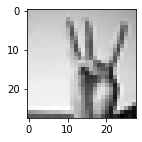

In [30]:
prediction3 = np.argmax(model3.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, prediction3)
print('Accuracy Score = ', accuracy3)

i = random.randint(1,len(prediction3))
fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0].reshape((28, 28)), cmap='gray') 
print("Predicted Label: ", class_names[int(prediction3[i])])
print("True Label: ", class_names[int(y_test[i])])

### Ensembling
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. In this notebook we are performing weighted ensembling to get the optimal result.

Ensembled Accuracy Score =  0.9612381483547128
Predicted Label:  C
True Label:  C


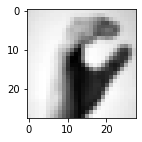

In [38]:
models = [model1, model2, model3]
predictions = [model.predict(X_test) for model in models]
weights = [0.5, 0.2, 0.3]
predictions = np.array(predictions)
dot = np.tensordot(predictions, weights, axes=((0), (0)))

ensemble_prediction = np.argmax(dot, axis=1)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
print('Ensembled Accuracy Score = ', ensemble_accuracy)

i = random.randint(1,len(ensemble_prediction))
fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0].reshape((28, 28)), cmap='gray') 
print("Predicted Label: ", class_names[int(ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

### Result
We are getting 96% accuracy on the test dataset.